In [1]:
!pip install scikeras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [3]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
data=pd.read_csv('gas_turbines.csv')
data=data.iloc[:,[0,1,2,7]]
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [5]:
data.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [6]:
data.describe().style.background_gradient(cmap='gnuplot2_r')

,AT,AP,AH,TEY
count,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.199240,79.124174,134.188464
std,7.574323,6.410760,13.793439,15.829717
min,0.522300,985.850000,30.344000,100.170000
25%,11.408000,1008.900000,69.750000,127.985000
50%,18.186000,1012.800000,82.266000,133.780000
75%,23.862500,1016.900000,90.043500,140.895000
max,34.929000,1034.200000,100.200000,174.610000


In [7]:
corr=data.corr()
corr

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,-0.207495
AP,-0.412953,1.000000,0.042573,0.146939
AH,-0.549432,0.042573,1.000000,-0.110272
TEY,-0.207495,0.146939,-0.110272,1.000000


<Axes: >

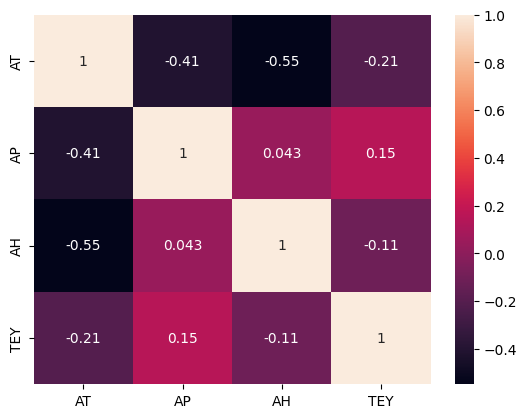

In [8]:
import seaborn as sns
sns.heatmap(corr,annot=True)

In [9]:
data['TEY'].nunique()

4207

In [10]:
data['TEY'].max()

174.61

In [11]:
data['TEY']=data['TEY'].apply(lambda x:1 if x>150 else 0)

In [12]:
data['TEY'].unique()

array([0, 1])

<Axes: xlabel='TEY', ylabel='count'>

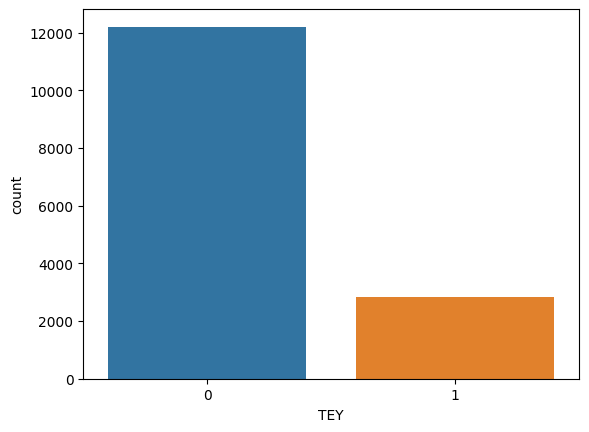

In [13]:
sns.countplot(x=data['TEY'])

In [14]:
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,0
1,6.7850,1008.4,97.118,0
2,6.8977,1008.8,95.939,0
3,7.0569,1009.2,95.249,0
4,7.3978,1009.7,95.150,0
...,...,...,...,...
15034,9.0301,1005.6,98.460,0
15035,7.8879,1005.9,99.093,0
15036,7.2647,1006.3,99.496,0
15037,7.0060,1006.8,99.008,0


In [15]:
import plotly.express as px
px.histogram(data,x='TEY',y='AT',text_auto=True)

<ipython-input-16-61b63f080ce4>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




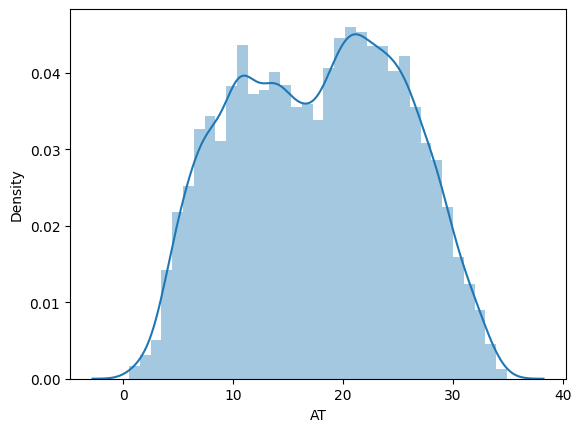

<ipython-input-16-61b63f080ce4>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




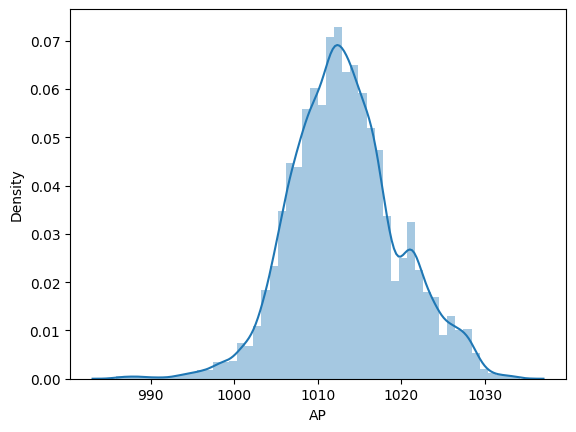

<ipython-input-16-61b63f080ce4>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




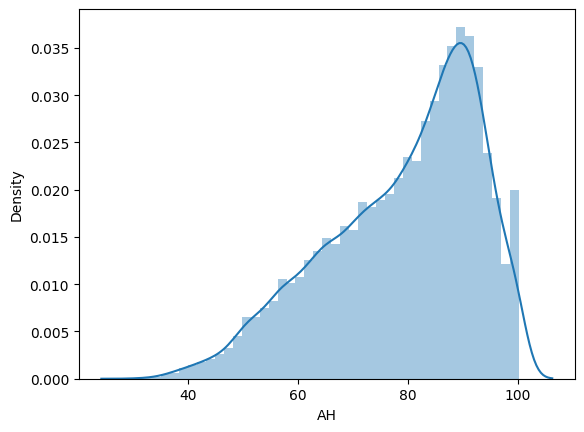

In [16]:
columns=['AT','AP','AH']
for i in columns:
  plt.show()
  sns.distplot(data[i])

In [17]:
fig=px.pie(data,values='AP',names="TEY",hover_data=['AP','TEY'],labels={'AP','TEY'})
fig.update_layout(title='<b> values lie between 0 and 1 for AP <b>',showlegend=True)
fig.show()

In [18]:
import seaborn as sns

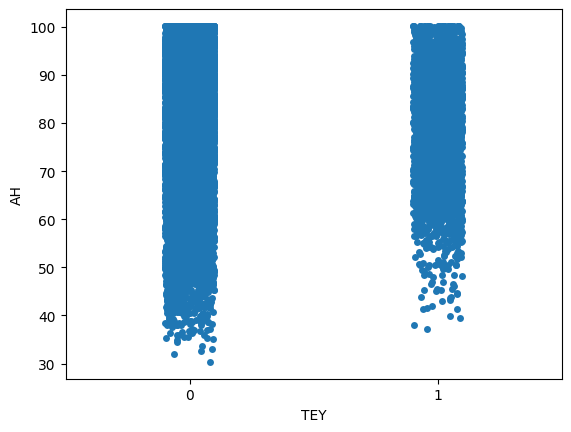

In [19]:
fig=sns.stripplot(data,x='TEY',y='AH')

In [20]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
x_train.shape,x_test.shape

((10527, 3), (4512, 3))

In [23]:
y_train.shape,y_test.shape

((10527,), (4512,))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.67599334, 0.4721346 , 0.80476581],
       [0.34960342, 0.70136698, 0.85874025],
       [0.70738257, 0.55415352, 0.64767864],
       ...,
       [0.61635379, 0.56466877, 0.88535377],
       [0.45748938, 0.40483701, 0.91187936],
       [0.50399196, 0.57518402, 0.85852043]])

In [25]:
x_test=scale.fit_transform(x_test)
x_test

array([[0.27592768, 0.41176471, 0.78867957],
       [0.91926892, 0.35315051, 0.3728241 ],
       [0.23444549, 0.87021143, 0.64990838],
       ...,
       [0.84466047, 0.44735189, 0.16555486],
       [0.51459311, 0.5750471 , 0.88398992],
       [0.1382242 , 0.72576931, 0.88036819]])

In [26]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  optmizer =RMSprop(0.03)
  model.compile(loss='mean_squared_error',metrics='accuracy',optimizer=optmizer)
  return model

In [27]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20]
epochs=[50,100,150,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.809 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.813 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END .........batch_size=10, epochs=100;, score=0.800 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END .........batch_size=10, epochs=100;, score=0.813 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END .........batch_size=10, epochs=100;, score=0.809 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END .........batch_size=10, epochs=100;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END .........batch_size=10, epochs=100;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END .........batch_size=10, epochs=150;, score=0.800 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END .........batch_size=10, epochs=150;, score=0.813 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END .........batch_size=10, epochs=150;, score=0.809 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END .........batch_size=10, epochs=150;, score=0.813 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END .........batch_size=10, epochs=150;, score=0.813 total time= 3.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END .........batch_size=10, epochs=200;, score=0.800 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END .........batch_size=10, epochs=200;, score=0.813 total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END .........batch_size=10, epochs=200;, score=0.809 total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END .........batch_size=10, epochs=200;, score=0.813 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END .........batch_size=10, epochs=200;, score=0.813 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.800 total time=  32.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.813 total time=  32.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.809 total time=  32.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.813 total time=  32.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.813 total time=  32.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END .........batch_size=20, epochs=100;, score=0.800 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END .........batch_size=20, epochs=100;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END .........batch_size=20, epochs=100;, score=0.809 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END .........batch_size=20, epochs=100;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END .........batch_size=20, epochs=100;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END .........batch_size=20, epochs=150;, score=0.800 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END .........batch_size=20, epochs=150;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END .........batch_size=20, epochs=150;, score=0.809 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END .........batch_size=20, epochs=150;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END .........batch_size=20, epochs=150;, score=0.813 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END .........batch_size=20, epochs=200;, score=0.800 total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END .........batch_size=20, epochs=200;, score=0.813 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END .........batch_size=20, epochs=200;, score=0.809 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END .........batch_size=20, epochs=200;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END .........batch_size=20, epochs=200;, score=0.813 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



In [28]:
print(result.best_score_,result.best_params_)

0.8095379562521288 {'batch_size': 10, 'epochs': 50}


###Tuning Hyperparameter:Dropout and Learning Rate

In [35]:
def create_model(dropout_rate,learning_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [37]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=20,dropout_rate=0.1,learning_rate=0.001)
dropout_rate=[0.1,0.3]
learning_rate=[0.001,0.01]
param_grid=dict(dropout_rate=dropout_rate,learning_rate=learning_rate)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.800 total time=  29.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.813 total time=  30.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.809 total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.813 total time=  30.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.813 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.800 total time=  28.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.813 total time=  33.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.809 total time=  28.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.813 total time=  28.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.813 total time=  28.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.800 total time=  29.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.813 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.809 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.813 total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.813 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.800 total time=  29.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.813 total time=  30.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.809 total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.813 total time=  42.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.813 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



In [38]:
print(result.best_params_,result.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8095379562521288


In [39]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [40]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result1=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=relu, init=zero;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=relu, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=relu, init=zero;, score=0.809 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=relu, init=zero;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=relu, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=relu, init=uniform;, score=0.800 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=relu, init=uniform;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=relu, init=uniform;, score=0.809 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=relu, init=uniform;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=relu, init=uniform;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=relu, init=normal;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=relu, init=normal;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=relu, init=normal;, score=0.809 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=relu, init=normal;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=relu, init=normal;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=tanh, init=zero;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=tanh, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=tanh, init=zero;, score=0.809 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=tanh, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=tanh, init=zero;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.792 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.811 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.814 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.805 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.810 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=tanh, init=normal;, score=0.794 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=tanh, init=normal;, score=0.815 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=tanh, init=normal;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=tanh, init=normal;, score=0.804 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=tanh, init=normal;, score=0.804 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=softmax, init=zero;, score=0.800 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=softmax, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=softmax, init=zero;, score=0.809 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=softmax, init=zero;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=softmax, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.809 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=softmax, init=normal;, score=0.800 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=softmax, init=normal;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=softmax, init=normal;, score=0.809 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=softmax, init=normal;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=softmax, init=normal;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=linear, init=zero;, score=0.800 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=linear, init=zero;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=linear, init=zero;, score=0.809 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=linear, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=linear, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=linear, init=uniform;, score=0.794 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=linear, init=uniform;, score=0.811 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=linear, init=uniform;, score=0.814 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=linear, init=uniform;, score=0.812 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=linear, init=uniform;, score=0.804 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 1/5] END activation_Function=linear, init=normal;, score=0.793 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 2/5] END activation_Function=linear, init=normal;, score=0.811 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 3/5] END activation_Function=linear, init=normal;, score=0.808 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 4/5] END activation_Function=linear, init=normal;, score=0.807 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



[CV 5/5] END activation_Function=linear, init=normal;, score=0.815 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



In [41]:
print(result1.best_params_,result1.best_score_)

{'activation_Function': 'relu', 'init': 'zero'} 0.8095379562521288


In [42]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='tanh'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [43]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50)
model.fit(X_train,y_train)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



1053/1053 [==============================] - 6s 4ms/step - loss: 0.5189 - accuracy: 0.8095
Epoch 2/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4485 - accuracy: 0.8095
Epoch 3/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4442 - accuracy: 0.8090
Epoch 4/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4354 - accuracy: 0.8090
Epoch 5/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.8086
Epoch 6/50
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4262 - accuracy: 0.8079
Epoch 7/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.8073
Epoch 8/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4250 - accuracy: 0.8059
Epoch 9/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4310 - accuracy: 0.8063
Epoch 10/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4243 - accurac

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7e91b4e5cca0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [44]:
y_pred_train=model.predict(X_train)

1053/1053 [==============================] - 5s 4ms/step


In [45]:
y_pred_test=model.predict(x_test)

452/452 [==============================] - 1s 3ms/step


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      8522
           1       0.00      0.00      0.00      2005

    accuracy                           0.81     10527
   macro avg       0.40      0.50      0.45     10527
weighted avg       0.66      0.81      0.72     10527



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [47]:
accuracy_score(y_train,y_pred_train)

0.8095373800702954

In [48]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3681
           1       0.00      0.00      0.00       831

    accuracy                           0.82      4512
   macro avg       0.41      0.50      0.45      4512
weighted avg       0.67      0.82      0.73      4512



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [49]:
accuracy_score(y_test,y_pred_test)

0.8158244680851063